# Counting paths from root to leaf in a CCT

Let $n$ be the number of nodes in the original causal DAG. In the worst case, the number of nodes in the corresponding CCT will be $n$. The first for-loop in Algorithm 1 (Lines 2-3) requires errors to be computed for every pair of nodes in the CCT, resulting in $\binom{n}{2}$ errors. Thus, the first for-loop requires the calculation of $O(n^2)$ errors. 

Let $k$ be the number of unique paths from root to leaf in the CCT. The second for-loop in Algorithm 1 (Lines 3-6) requires two errors to be computed for all ($k - 1$) compositions: one for internal consistency and one for external validity. The total number of unique paths from root to leaf is $k = 2^{n-2}$, where $n-2$ is the number of cutpoints in the original DAG. This requires $O(2^n)$ errors to be calculated. 

Thus, the total number of errors to be calculated will be $O(2^n)$.

Below, we empirically demonstrate that the total number of unique paths from root to leaf in a CCT is $2^{n-2}$.

## Preamble

In [1]:
# General importations.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import platform
import time
import warnings
import math

import networkx as nx
from task_generation import Utils

# View versioning.
print("python version     :", platform.python_version())
print("numpy version      :", np.__version__)
print("pandas version     :", pd.__version__)
print("matplotlib version :", matplotlib.__version__)
print("seaborn version    :", sns.__version__)

python version     : 3.10.13
numpy version      : 1.26.3
pandas version     : 2.1.4
matplotlib version : 3.8.0
seaborn version    : 0.12.2


# CCTs

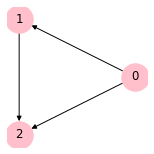

Total nodes: 3
Total edges: 3



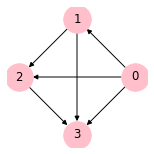

Total nodes: 4
Total edges: 6



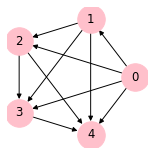

Total nodes: 5
Total edges: 10



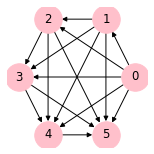

Total nodes: 6
Total edges: 15



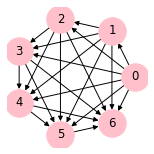

Total nodes: 7
Total edges: 21



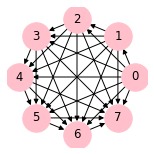

Total nodes: 8
Total edges: 28



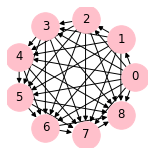

Total nodes: 9
Total edges: 36



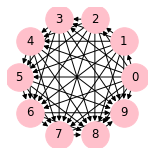

Total nodes: 10
Total edges: 45



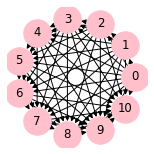

Total nodes: 11
Total edges: 55



In [2]:
utils = Utils()
graphs = []
smallest = 1
largest = 10
for n in range(smallest,largest):
    G = utils.get_cct(n)
    utils.plot_nx(adjacency_matrix = nx.to_numpy_array(G),
                  labels = list(G.nodes),
                  dpi = 70,
                  figsize = (2,2))
    graphs.append(G)

    # Print total nodes.
    print("Total nodes:", len(G))
    
    # Print total edges.
    print("Total edges:", G.size())
    print()

In [3]:
path_lengths = []
for graph in graphs:
    print("Total nodes     :", len(graph))
    print("Total cutpoints :", len(graph)-2)
    print("Total edges     :", graph.size())
    leaf = list(graph.nodes())[-1]
    root = list(graph.nodes())[0]
    paths = nx.all_simple_paths(graph, root, leaf)
    total_paths = len(list(paths))
    path_lengths.append(total_paths)
    print("Total paths     :", total_paths)
    print("Per forumala    :", utils.get_total_paths_cct(len(graph)))
    print()

Total nodes     : 3
Total cutpoints : 1
Total edges     : 3
Total paths     : 2
Per forumala    : 2

Total nodes     : 4
Total cutpoints : 2
Total edges     : 6
Total paths     : 4
Per forumala    : 4

Total nodes     : 5
Total cutpoints : 3
Total edges     : 10
Total paths     : 8
Per forumala    : 8

Total nodes     : 6
Total cutpoints : 4
Total edges     : 15
Total paths     : 16
Per forumala    : 16

Total nodes     : 7
Total cutpoints : 5
Total edges     : 21
Total paths     : 32
Per forumala    : 32

Total nodes     : 8
Total cutpoints : 6
Total edges     : 28
Total paths     : 64
Per forumala    : 64

Total nodes     : 9
Total cutpoints : 7
Total edges     : 36
Total paths     : 128
Per forumala    : 128

Total nodes     : 10
Total cutpoints : 8
Total edges     : 45
Total paths     : 256
Per forumala    : 256

Total nodes     : 11
Total cutpoints : 9
Total edges     : 55
Total paths     : 512
Per forumala    : 512



## Plot growth curve

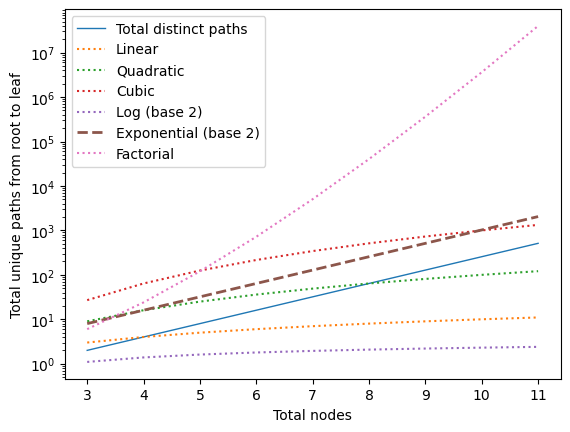

In [4]:
node_counts = [len(g) for g in graphs]

plt.plot(node_counts, path_lengths, label = "Total distinct paths", linewidth = 1)
#plt.ylim((1,max(path_lengths)))
plt.yscale("log")
plt.plot(node_counts, [x for x in node_counts], label = "Linear", linestyle = "dotted")
plt.plot(node_counts, [x**2 for x in node_counts], label = "Quadratic", linestyle = "dotted")
plt.plot(node_counts, [x**3 for x in node_counts], label = "Cubic", linestyle = "dotted")
plt.plot(node_counts, [np.log(x) for x in node_counts], label = "Log (base 2)", linestyle = "dotted")
plt.plot(node_counts, [2**x for x in node_counts], label = "Exponential (base 2)", linestyle = "dashed", linewidth = 2)
plt.plot(node_counts, [math.factorial(x) for x in node_counts], label = "Factorial", linestyle = "dotted")
plt.legend(loc = "upper left")
plt.xlabel("Total nodes")
plt.ylabel("Total unique paths from root to leaf")
plt.show()
plt.close()

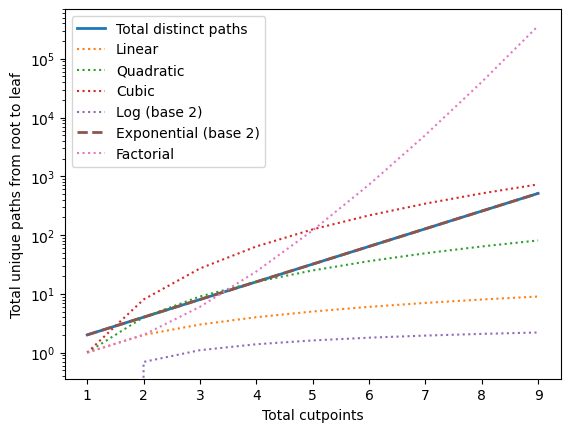

In [5]:
## node_counts = [len(g) for g in graphs]
cutpoint_counts = [x-2 for x in node_counts]

plt.plot(cutpoint_counts, path_lengths, label = "Total distinct paths", linewidth = 2)
#plt.ylim((1,max(path_lengths)))
plt.yscale("log")
plt.plot(cutpoint_counts, [x for x in cutpoint_counts], label = "Linear", linestyle = "dotted")
plt.plot(cutpoint_counts, [x**2 for x in cutpoint_counts], label = "Quadratic", linestyle = "dotted")
plt.plot(cutpoint_counts, [x**3 for x in cutpoint_counts], label = "Cubic", linestyle = "dotted")
plt.plot(cutpoint_counts, [np.log(x) for x in cutpoint_counts], label = "Log (base 2)", linestyle = "dotted")
plt.plot(cutpoint_counts, [2**x for x in cutpoint_counts], label = "Exponential (base 2)", linestyle = "dashed", linewidth = 2)
plt.plot(cutpoint_counts, [math.factorial(x) for x in cutpoint_counts], label = "Factorial", linestyle = "dotted")
plt.legend(loc = "upper left")
plt.xlabel("Total cutpoints")
plt.ylabel("Total unique paths from root to leaf")
plt.show()
plt.close()

## End of document